# Домашня робота BigData School Самошина Андрія
**Дано:** бінарна класифікація *Johnny Depp or Leonardo DiCaprio*, модель з *Python code*


> *Робота виконана не в Azure Notebooks, аби попрактикувати вивід моделей саме із локального середовища і з локальними файлами. До того ж достатній час був відсутній зв'язок із сервісом, тому аби не витрачати час даремно, робота велася локально.*





##Формування датасету

Такий датасет не є досить стандартним (як, наприклад, коти та собаки), тому мені не вдалося знайти готовий. Тому необхідно сформувати його власноруч.

Забігаючи наперед, модель нам необхідно буде тренувати власноруч з коду, тому гарним тоном вважається зібрати **багато даних** для прийнятного навчання. Але це є навчальним прикладом, тому для економії часу та ресурсів я зібрав **невелику кількість фото**.

Для роботи з датасетом фото необхідно розмітити. Для цього скористаємося Data Labeling. Створюємо новий проект та лейблимо наші дані:

![1](https://drive.google.com/uc?export=view&id=1XQbwyK2x6PiOAa8EzWitsQ2scIZglti5)

Зрештою, після розмітки отримаємо готовий датасет. Бачимо, що співвідношення классів в межах нормального.

![2](https://drive.google.com/uc?export=view&id=1bgcGYwmz3PqB8hL_9S5awHsQlRHjUcxd)

Оскільки необхідно використвовувати модель з коду, то я оберу навчити її локально (для більш реальної змодельованої ситуації), коли є локальна навтренована модель і треба щось із нею роботи у воркспейсі.

In [1]:
import os
import matplotlib.pyplot as plt
import cv2
import keras
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from random import randint
import matplotlib.gridspec as gridspec
from keras.utils import to_categorical

In [2]:
def get_images(directory):
    Images = []
    Labels = []  
    label = 0
    
    for labels in os.listdir(directory): 
        if labels == 'depp': # Папка Depp визначає мітку класу як 1
            label = 1
        elif labels == 'dicaprio':
            label = 0
        
        for image_file in os.listdir(directory+labels): 
            #print(image_file)
            image = cv2.imread(directory+labels+r'/'+image_file) 
            image = cv2.resize(image,(150,150)) #Зміна розміру дуже важлива для навчання
            image = image / 255.0
            Images.append(image)
            Labels.append(label)
    
    return shuffle(Images,Labels,random_state=47)

def get_images_test(directory):
    Images = []
    Labels = []
    label = 0
        
    for image_file in os.listdir(directory):
        #print(image_file)
        image = cv2.imread(directory+r'/'+image_file)
        image = cv2.resize(image,(150,150))
        image = image / 255.0
        image = image.astype(np.float32)
        Images.append(image)
        Labels.append(label)
        
    return shuffle(Images,Labels,random_state=47)

def get_classlabel(class_code):
    labels = {1:'depp', 0:'dicaprio'}
    
    return labels[class_code]

In [ ]:
Images, Labels = get_images('/content/train/') #Завантажуємо тренувальні зображення та мітки

Images = np.array(Images)
Labels = np.array(Labels)

In [ ]:
Labels = to_categorical(Labels, 2)
print("Shape of Train Images:",Images.shape)
print("Shape of Train Labels:",Labels.shape)

Shape of Train Images: (248, 150, 150, 3)
Shape of Train Labels: (248, 2)


## Моделювання

Не будемо детально зупинятися на моделі, лише коротко:
*   **Conv Layer:** Цей шар витягує важливі функції із зображення
*   **Pooling Layer:** Цей шар зменшує просторовий об’єм вхідного зображення після згортки, виділяючи важливі особливості
*   **Hidden Layer:** він підключає мережу від шару до іншого шару
*   **Output Layer:** Це останній шар з нейронами, рівний кількості класів






In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout
from keras.layers import Dense, Flatten

import cv2

In [ ]:
model3 = Sequential()
model3.add(Conv2D(filters = 32, kernel_size = (5,5),activation ='relu', input_shape = (150,150,3)))
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Conv2D(filters = 64, kernel_size = (3,3),activation ='relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Conv2D(filters = 128, kernel_size = (3,3),activation ='relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Conv2D(filters =128, kernel_size = (3,3),activation ='relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Flatten())
model3.add(Dense(512, activation = "relu"))
model3.add(Dense(64, activation = "relu"))
model3.add(Dropout(0.5))
model3.add(Dense(2, activation='softmax'))
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
trained = model3.fit(Images,Labels,epochs=15,validation_split=0.20, batch_size = 32)

Epoch 1/15
7/7 [==============================] - 8s 1s/step - loss: 0.7587 - accuracy: 0.4899 - val_loss: 0.6910 - val_accuracy: 0.5200
Epoch 2/15
7/7 [==============================] - 8s 1s/step - loss: 0.6980 - accuracy: 0.5202 - val_loss: 0.6905 - val_accuracy: 0.5200
Epoch 3/15
7/7 [==============================] - 8s 1s/step - loss: 0.6897 - accuracy: 0.5253 - val_loss: 0.6906 - val_accuracy: 0.5200
Epoch 4/15
7/7 [==============================] - 8s 1s/step - loss: 0.6912 - accuracy: 0.5303 - val_loss: 0.6877 - val_accuracy: 0.5200
Epoch 5/15
7/7 [==============================] - 8s 1s/step - loss: 0.6882 - accuracy: 0.6212 - val_loss: 0.6807 - val_accuracy: 0.6200
Epoch 6/15
7/7 [==============================] - 8s 1s/step - loss: 0.6792 - accuracy: 0.6010 - val_loss: 0.6506 - val_accuracy: 0.5600
Epoch 7/15
7/7 [==============================] - 8s 1s/step - loss: 0.6426 - accuracy: 0.6364 - val_loss: 0.5879 - val_accuracy: 0.7200
Epoch 8/15
7/7 [=========================

Як ми бачимо нижче, вона є дещо оверфітнутою, але наразі точність не відіграє великого значення. Моделями займемося наступного разу))

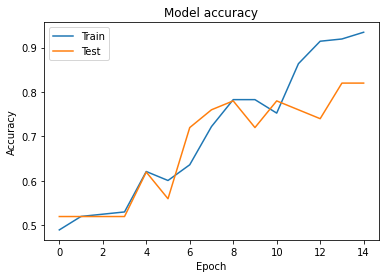

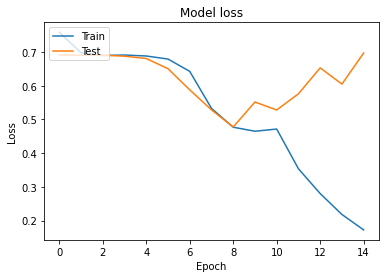

In [ ]:
plt.plot(trained.history['accuracy'])
plt.plot(trained.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(trained.history['loss'])
plt.plot(trained.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Потім ми виміряємо точність, оцінивши модель нейронної мережі на нашому тестовому наборі даних і з нашого балу точності ми бачимо, що наша модель працює непогано:

In [ ]:
test_images,test_labels = get_images('/content/test/')
test_images = np.array(test_images)
test_labels = np.array(test_labels)

test_labels = to_categorical(test_labels, 2)
print("Shape of Train Images:",test_images.shape)
print("Shape of Train Labels:",test_labels.shape)

Shape of Train Images: (27, 150, 150, 3)
Shape of Train Labels: (27, 2)


In [ ]:
model3.evaluate(test_images,test_labels)

1/1 [==============================] - 0s 2ms/step - loss: 0.5069 - accuracy: 0.7778


[0.5069005489349365, 0.7777777910232544]

In [4]:
pred_images,no_labels = get_images_test('/content/pred/')
pred_images = np.array(pred_images)
pred_images.shape

(9, 150, 150, 3)

[0.99365425 0.00634576]
[0.6522005 0.3477995]
[0.97369045 0.02630955]
[0.9373803  0.06261964]
[0.98827374 0.01172625]
[9.9940836e-01 5.9160177e-04]
[0.8915316  0.10846842]
[0.01104016 0.9889599 ]
[0.9935609  0.00643911]


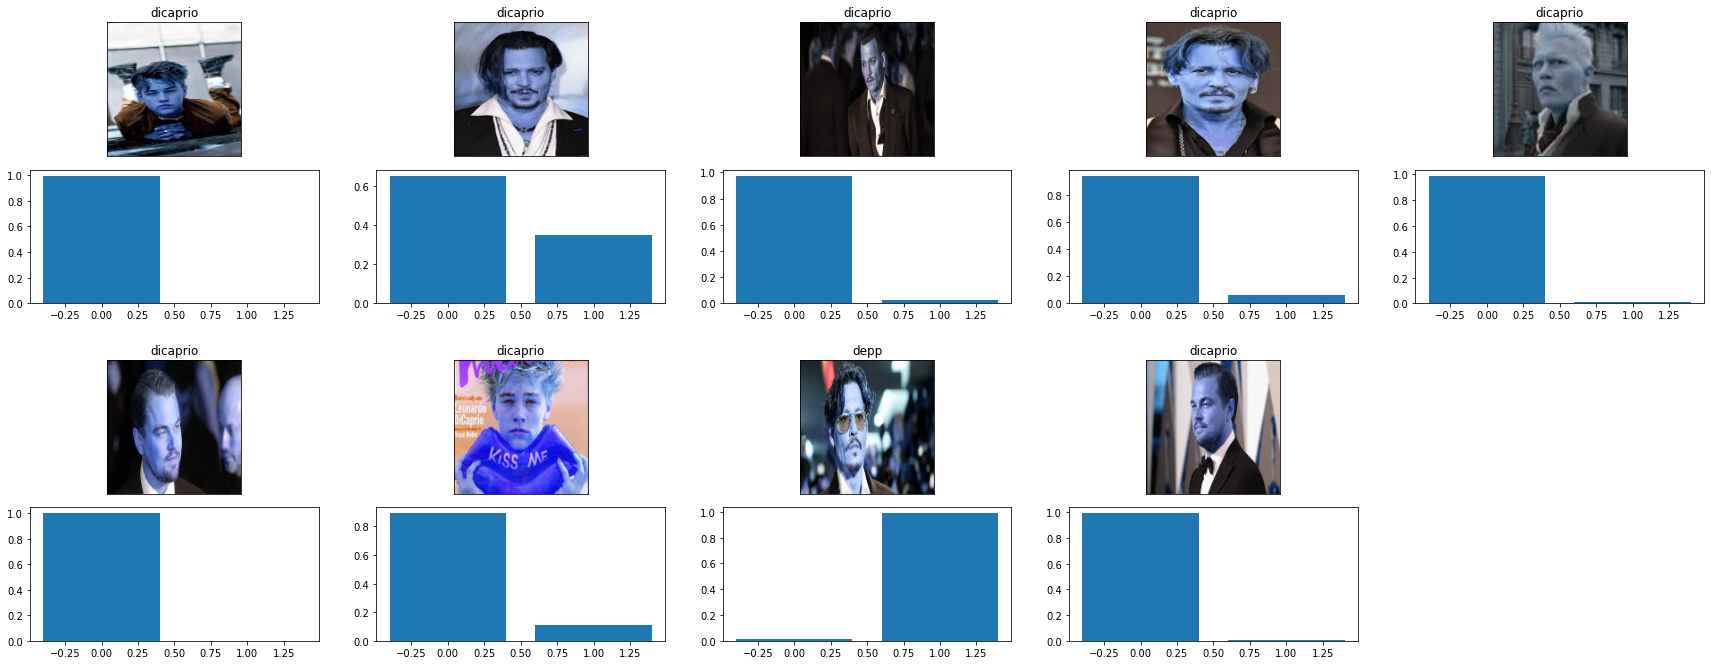

In [ ]:
fig = plt.figure(figsize=(30, 30))
outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)

for i in range(9):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    pred_image = np.array([pred_images[i]])
    pred_class = get_classlabel(np.argmax(model3.predict(pred_image), axis=-1)[0])
    pred_prob = model3.predict(pred_image).reshape(2)
    print(pred_prob)
    for j in range(2):
        if (j%2) == 0:
            ax = plt.Subplot(fig, inner[j])
            ax.imshow(pred_image[0])
            ax.set_title(pred_class)
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
        else:
            ax = plt.Subplot(fig, inner[j])
            ax.bar([0,1],pred_prob)
            fig.add_subplot(ax)


fig.show()

Готову натреновану модель збережемо у відповідному форматі.

In [ ]:
from keras.models import load_model
modelpath = 'actor_pictures.h5'
model3.save(modelpath)

## Створення експериментів

Для початку, ідентифікуємо наш Воркспейс для подальшої роботи в Azure.



In [ ]:
workspace="MLsecond"
resource_grp="RGBigDataSchool"
subscription_id="31526bd3-bfec-4853-bd82-7d8a5ab50724"

In [ ]:
#!pip install azureml
#!pip install azureml.core

In [ ]:
import sys
import requests
import time
import base64
import datetime
import azureml.core
import shutil
import os, json
from azureml.core import Workspace
from azureml.core.run import Run
from azureml.core.experiment import Experiment
from azureml.core.model import Model
import azureml.core
from azureml.core.authentication import ServicePrincipalAuthentication

ws = Workspace(workspace_name = workspace,
               subscription_id = subscription_id,
               resource_group = resource_grp)

ws.get_details()

{'applicationInsights': '/subscriptions/31526bd3-bfec-4853-bd82-7d8a5ab50724/resourcegroups/rgbigdataschool/providers/microsoft.insights/components/mlbigdataschoo7078768890',
 'containerRegistry': '/subscriptions/31526bd3-bfec-4853-bd82-7d8a5ab50724/resourcegroups/rgbigdataschool/providers/microsoft.containerregistry/registries/65d99e0089524e1ead9af4112164caec',
 'creationTime': '2020-11-25T14:51:27.1887142+00:00',
 'description': '',
 'discoveryUrl': 'https://westeurope.experiments.azureml.net/discovery',
 'friendlyName': 'MLsecond',
 'hbiWorkspace': False,
 'id': '/subscriptions/31526bd3-bfec-4853-bd82-7d8a5ab50724/resourceGroups/RGBigDataSchool/providers/Microsoft.MachineLearningServices/workspaces/MLsecond',
 'identityPrincipalId': '935c4498-56ec-49d4-93f5-959f6ec84a07',
 'identityTenantId': '5688f302-c574-4173-873b-74ab207b3ba4',
 'identityType': 'SystemAssigned',
 'keyVault': '/subscriptions/31526bd3-bfec-4853-bd82-7d8a5ab50724/resourcegroups/rgbigdataschool/providers/microsoft.k

Створимо експеримент і додамо інфомацію про метрики моделі на навчальній та тестовій вибірці. Також додамо файл моделі для того, або можна було її потім завантажити.

In [ ]:
myexperiment = Experiment(ws, 'actor_experiment')
run = myexperiment.start_logging()

In [ ]:
score_test = model3.evaluate(test_images, test_labels)
score_train = model3.evaluate(Images,Labels)

8/8 [==============================] - 3s 343ms/step - loss: 0.2399 - accuracy: 0.9194


In [ ]:
run.log_list("Accuracy", [score_test[1], score_train[1]])
run.log_list("Loss", [score_test[0], score_train[0]])

In [ ]:
cmtx = confusion_matrix(np.argmax(test_labels,axis=1),np.argmax(model3.predict(test_images),axis=1))
cmtx = {

"schema_type": "confusion_matrix",
 "data": {"class_labels": ["0", "1"],
          "matrix": [[int(y) for y in x] for x in cmtx]}
}
run.log_confusion_matrix('Confusion matrix', cmtx)


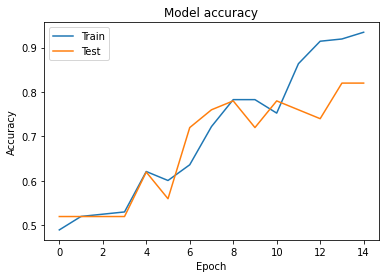

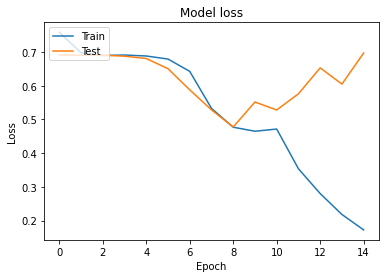

In [ ]:
plt.plot(trained.history['accuracy'])
plt.plot(trained.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig("accuracy.png", transparent=True, bbox_inches='tight')
run.log_image("Accurecy image", '/content/accuracy.png')
plt.show()

plt.plot(trained.history['loss'])
plt.plot(trained.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig("loss.png", transparent=True, bbox_inches='tight')
run.log_image("Loss image", '/content/loss.png')
plt.show()

Всі значення успішно додались до експерименту:

![6](https://drive.google.com/uc?export=view&id=1hBIOHhwQI5K5-Q9AYeUSHjAP2OdIn9MV)

**Залоговані метрики:**

![7](https://drive.google.com/uc?export=view&id=1lhXPcCaO1QY_rDliw_su6gnsxH_5hI40)

**Матриця помилок:**

![10](https://drive.google.com/uc?export=view&id=1pWVxnBBjXkXs-6ZEwpZFIWT5HFlNHGMm)

**Графіки точності та помилки:**

![10](https://drive.google.com/uc?export=view&id=13SGZk-hIpSU1iV1j-66zf9wTKsYGcRKv)

In [ ]:
run.upload_file('actor_pictures.h5', '/content/actor_pictures.h5')

І доданий файл цієї моделі:

![7](https://drive.google.com/uc?export=view&id=1j3GXnhTfiK5UgdB93bvryJz-Avjq_hX1)



## Інтерпретація моделі

Важливою частиною навчання є інтерпретація результатів, тобто розуміння всіх вивідних даних моделі. На жаль, для нейронних мереж є досить мало інтерпретаторів, особливо для роботи із зображеннями в Keras. Нижче приводжу приклад інтерпретації моєї згорткової мережі. Додам, що у мене вже був досвід інтепретації табличних даних (приклад, участь у конкурсі від НБУ https://kytobiy-project.herokuapp.com/ у розділі Модель та результати), але тут такі навички не потрібні.

На жаль, мені не вдалося знайти приклад роботи інтерпретаторів від Azure для зображення, хоча вони заявлені в документації, тому я буду використовувати інші.

In [ ]:
#!pip install keras_applications
#!pip install eli5

In [ ]:
import eli5

from keras_applications.imagenet_utils import decode_predictions
from IPython.display import display
from PIL import Image
from keras.models import Model

from lime import lime_image
from lime.wrappers.scikit_image import SegmentationAlgorithm
from skimage.segmentation import slic, mark_boundaries
from skimage.io import imread

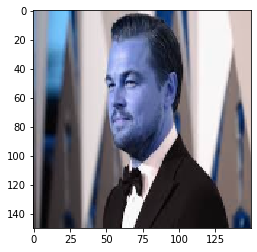

In [ ]:
layer_outputs = [layer.output for layer in model3.layers][1:]
activation_model = Model(inputs=model3.input, outputs=layer_outputs)
image_example = np.array([pred_images[8]])
activations = activation_model.predict(image_example)

plt.imshow(pred_images[8], interpolation='nearest')
plt.savefig("input_image.png", transparent=True, bbox_inches='tight')

run.log_image("Example input image", '/content/input_image.png')

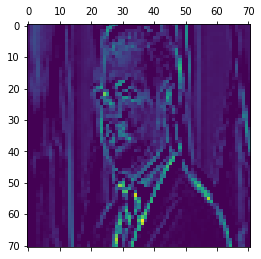

In [ ]:
plt.matshow(activations[1][0, :, :, 1], cmap='viridis')
plt.savefig("activation_on_image.png", transparent=True, bbox_inches='tight')

run.log_image("Example activation on image", '/content/activation_on_image.png')

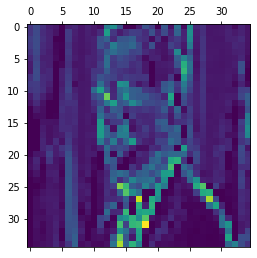

In [ ]:
plt.matshow(activations[2][0, :, :, 1], cmap='viridis')
plt.savefig("activation_on_image_2.png", transparent=True, bbox_inches='tight')

run.log_image("Example activation on image", '/content/activation_on_image_2.png')

Вище бачимо вхідне зображення і результати після першої і другої згортки мережі.

In [ ]:
#!pip install lime

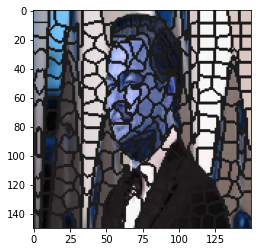

In [ ]:
segments = slic(pred_images[8], n_segments=250, compactness=10, sigma=1)

plt.imshow(mark_boundaries(pred_images[8], segments, color=[27/255, 27/255, 27/255]))
plt.savefig("segmentation.png", transparent=True, bbox_inches='tight')

run.log_image("Example segmentation on image", '/content/segmentation.png')


In [ ]:
def produce_perturbed_image(
    image: np.array, 
    segments: np.array, 
    hide_percentage: int = 0.2
) -> None:
    segments_idx_all = np.unique(segments)
    segments_idx_to_hide = np.random.choice(segments_idx_all, int(segments_idx_all.size * hide_percentage))
    perturbed_image = image.copy()
    for x in segments_idx_all:
        if x in segments_idx_to_hide:
            perturbed_image[segments == x] = (27/255, 27/255, 27/255)
    return perturbed_image

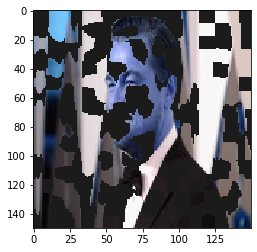

In [ ]:
perturbed_image = produce_perturbed_image(pred_images[8], segments, 0.5)

plt.imshow(perturbed_image, interpolation='nearest')
plt.savefig("perturbation.png", transparent=True, bbox_inches='tight')

run.log_image("Example perturbation on image", '/content/perturbation.png')

На зображеннях вище бачимо, що зображення рівномірно сегментується, це добре для моделі. Однак серед видалених серментів, є важливі, як наприклад рот чи вухо.

In [ ]:
run.complete()
run_id = run.id
print ("run id:", run_id)

run id: 11a4b2b5-6bab-42e1-bafe-80602a3e813b


Через те, що я використовув інтерпретацію моделі не з бібліотеки Azure Interpret, мені не вдалося отримати результати у вкладці Explanations. Думаю, що у випадку табличних даних все вийшло б як потрібно.
Як альтернатива, я завантажив приклади як звичайні картинки. Все залоговано успішно!

![9](https://drive.google.com/uc?export=view&id=1rvKGMJ5xcjKOgPzKe_VspkfvDWaUiiI6)

## Серіалізація Keras моделі у ONNX формат

Попередньо дослідивши матеріали, виявилось, що ONNX забезпечує кращу взаємодію між моделями, побудованими з використанням різних фреймворків. До того ж від підтримується Azure Machine Learning.

Засоби машинного навчання ONNX надають метод convert_keras для легкого перетворення моделей Keras в моделі ONNX. Потім ми можемо серіалізувати цю модель у файл .onnx.

In [ ]:
#!pip install onnxmltools
#!pip install onnxruntime

In [ ]:
import onnxmltools

onnx_model = onnxmltools.convert_keras(model3) 

onnxmltools.utils.save_model(onnx_model, 'keras_actors.onnx')

tf executing eager_mode: True
tf.keras model eager_mode: False
The ONNX operator number change on the optimization: 47 -> 24


Щоб перевірити, чи все ок і можемо запустити модель ONNX, ми використаємо механізм виконання ONNX:

In [ ]:
import onnxruntime

session = onnxruntime.InferenceSession("keras_actors.onnx")

first_input_name = session.get_inputs()[0].name
print(first_input_name)

first_output_name = session.get_outputs()[0].name
print(first_output_name)

conv2d_input
dense_2


In [ ]:
results = session.run([first_output_name], {first_input_name: pred_images[0:5]})
results

[array([[0.99365425, 0.00634576],
        [0.6522006 , 0.3477994 ],
        [0.97369045, 0.02630956],
        [0.9373803 , 0.06261964],
        [0.98827374, 0.01172625]], dtype=float32)]

Супер! На виході маємо модель у вигляді файлів двох популярних форматів (про всяк випадок), як необхідно було в умові. Можна переходити для етапу деплоїнгу.

## Реєстрація ONNX моделі в Azure Machine Learning Service


Реєструємо нашу модель ONNX у робочій області. І перевіримо, що все нормально зареєстровано:

In [ ]:
from azureml.core.model import Model

model_onnx = Model.register(model_path = "/content/keras_actors.onnx",
                       model_name = "actors_pictures_onnx",
                       model_framework=Model.Framework.ONNX ,
                       description = "Actors Keras Model",
                       workspace = ws)

Registering model actors_pictures_onnx


Дійсно, модель з'явилася у списку зареєстрованих.

![3](https://drive.google.com/uc?export=view&id=1cnwE-Id76pZyfS8KakDEfZHBu8PQDS7y)

In [ ]:
model_load = Model(ws,'actors_pictures_onnx')
model_list = Model.list(workspace=ws)
print("Model picked: {} \nModel Description: {} \nModel Version: {}".format(model_load.name, model_load.description, model_load.version))

Model picked: actors_pictures_onnx 
Model Description: Actors Keras Model 
Model Version: 5


## Деплоїнг моделі (оточення за замовчуванням)

Розгорнення моделі як веб-служби відбувається за допомогою Model.deploy(). Веб-служби беруть одну або кілька моделей, завантажують їх у середовище та запускають на одній із декількох підтримуваних цілей розгортання.

Для початку, виконаємо **за допомогою середи за замовчуванням** (ONNX моделі мають таку можливість):

In [ ]:
from azureml.core import Webservice
from azureml.exceptions import WebserviceException

service_name = 'actor-classification-service'

try:
    Webservice(ws, service_name).delete()
except WebserviceException:
    pass

service_onnx = Model.deploy(ws, service_name, [model_onnx])

In [ ]:
service_onnx.wait_for_deployment(show_output=True)

print(service_onnx.state)
print(service_onnx.scoring_uri)

Tips: You can try get_logs(): https://aka.ms/debugimage#dockerlog or local deployment: https://aka.ms/debugimage#debug-locally to debug if deployment takes longer than 10 minutes.
SucceededACI service creation operation finished, operation "Succeeded"
Healthy
http://b176ef8f-d7a3-48af-be49-178e0fb32d44.westeurope.azurecontainer.io/score


Все успішно виконано, перевіримо на сервісі! Бачимо, що лог не висвічує помилок:

![4](https://drive.google.com/uc?export=view&id=1xkOfSf9bZzwBQ25ZjxIoTpe8Eaalvwsc)

І статус деплоїнгу не може не тішити) 

![5](https://drive.google.com/uc?export=view&id=1oBYFInhRKQHpgAyDNBFlCl0FdIU_Y7s_)

## Деплоїнг моделі (визначаємо файли відрахунку та оточення)

Зараз я хочу розгорнути модель ONNX із виводами результатів про час виконання. Спочатку пишемо файл score.py, який допоможе запустити модель у нашій віртуальній машині Azure ML, а потім визначимо середовище, написавши файл yml. Також імпортуємо бібліотеку onnxruntime, щоб зробити виводи про час виконання (передаючи вхідні дані та оцінюючи передбачуваний вихідний результат моделі).

**Score File**

Файл оцінок - це те, що говорить нашій хмарній службі Azure, що робити. Після ініціалізації нашої моделі за допомогою azureml.core.model ми запускаємо сеанс виведення ONNX Runtime, щоб оцінити дані, передані під час викликів наших функцій.

In [ ]:
%%writefile score.py

import json
import sys

from azureml.core.model import Model
import numpy as np
import onnxruntime
import time

def init():
    global model_path
    model_path = Model.get_model_path(model_name = 'actors_pictures_onnx')

def run(raw_data):
    try:
        imagebase64 = json.loads(raw_data)['data']
        
        data = np.array(imagebase64, dtype=np.float32).reshape(1,150,150,3)

        session = onnxruntime.InferenceSession(model_path)
        first_input_name = session.get_inputs()[0].name
        first_output_name = session.get_outputs()[0].name
        start = time.time()

        result = session.run([first_output_name], {first_input_name: data})
        end = time.time()
        result = result[0].tolist()
        depp_prob = result[0][1]
        dicaprio_prob = result[0][0]
        return {"dicaprio probability": dicaprio_prob, "depp probability": depp_prob, "time_in_sec": end - start}
    except Exception as e:
        result = str(e)
        return {"error": result}

Overwriting score.py


**Environment File**

Цей крок створює файл середовища YAML, який визначає, які залежності ми хотіли б бачити у нашій віртуальній машині.

In [ ]:
from azureml.core.conda_dependencies import CondaDependencies 

myenv = CondaDependencies.create(pip_packages=["numpy", "onnxruntime", "azureml-core", "azureml-defaults"])

with open("myenv.yml","w") as f:
    f.write(myenv.serialize_to_string())

**Створити конфігурацію виводу**

Пов'язуємо між собою створені вище файли та іншу необхідну інформацію.

In [ ]:
from azureml.core.model import InferenceConfig
from azureml.core.environment import Environment


myenv = Environment.from_conda_specification(name="myenv", file_path="myenv.yml")
inference_config = InferenceConfig(entry_script="score.py", environment=myenv)

**Розгорнення моделі**

In [ ]:
from azureml.core.webservice import AciWebservice

aciconfig = AciWebservice.deploy_configuration(tags = {"data": "image", "type": "classification"}, 
                                               description = 'Actors classification model')

In [ ]:
aci_service_name = 'actors-binary-classification-new'
print("Service", aci_service_name)
aci_service = Model.deploy(ws, aci_service_name, [model_onnx], inference_config, aciconfig)
aci_service.wait_for_deployment(True)
print(aci_service.state)

Service actors-binary-classification-new
Tips: You can try get_logs(): https://aka.ms/debugimage#dockerlog or local deployment: https://aka.ms/debugimage#debug-locally to debug if deployment takes longer than 10 minutes.
Running...........................................
Succeeded
ACI service creation operation finished, operation "Succeeded"
Healthy


**Успіх!** Тепер у нас є розгорнута модель. Отримаємо URL-адресу веб-служби:

In [ ]:
print("Scoring API served at:", aci_service.scoring_uri)

Scoring API served at: http://9aaf009e-4122-44e1-bc60-bdea3e24718f.westeurope.azurecontainer.io/score


![11](https://drive.google.com/uc?export=view&id=1zoTgn4PR04AL6Z4COA5ZXO0oYUtltc2c)

Тепер перевіримо чи все правильно працює. Для цього звертаємося до створеного сервісу із тестовими даними на вході у json-форматі.


In [ ]:
for i in range(4):
  input_data = json.dumps({'data': pred_images[i].tolist()})
  r = aci_service.run(input_data)
  depp = r['depp probability']
  dicaprio = r['dicaprio probability']
  time_ms = np.round(r['time_in_sec'] * 1000, 2)
  print(dicaprio, depp, time_ms)


0.9936542510986328 0.006345758680254221 135.81
0.6522006988525391 0.34779930114746094 108.54
0.9736904501914978 0.026309579610824585 103.27
0.9373804330825806 0.0626196339726448 109.55


На вході отримаємо такі ж результати, як і були на самому початку роботи (коли ми перевіряли роботу моделі локально), але тепер підрахунки відбуваються на сервісі. **Вивід наступний:** ймовірність, що на фото Ді Капріо; ймовірність, що це Депп; витрачений час на роботу сервісу.

Тепер спробуємо звернутися до серверу безпосередньо за посиланням scoring_uri. Тобто якщо хтось із користувачів захоче використати мою задеплоїну модель.

In [5]:
import requests
import json

scoring_uri = 'http://9aaf009e-4122-44e1-bc60-bdea3e24718f.westeurope.azurecontainer.io/score'
headers = {'Content-Type':'application/json'}

for i in range(4):
  test_data = json.dumps({'data': pred_images[i].tolist()})
  response = requests.post(scoring_uri, data=test_data, headers=headers)
  print(response.status_code)
  print(response.elapsed)
  print(response.json())

200
0:00:03.789158
{'dicaprio probability': 0.9936542510986328, 'depp probability': 0.006345758680254221, 'time_in_sec': 0.11894965171813965}
200
0:00:01.930433
{'dicaprio probability': 0.6522006988525391, 'depp probability': 0.34779930114746094, 'time_in_sec': 0.10996031761169434}
200
0:00:03.249289
{'dicaprio probability': 0.9736904501914978, 'depp probability': 0.026309579610824585, 'time_in_sec': 0.09088373184204102}
200
0:00:02.220507
{'dicaprio probability': 0.9373804330825806, 'depp probability': 0.0626196339726448, 'time_in_sec': 0.0925149917602539}


Бачимо, що результати звернення співпадають з тими, що були вище. Це означає, що деплоїнг пройшов успішно!

In [6]:
!pip install nbconvert

In [9]:
%%shell
jupyter nbconvert --to html /content/Big_Data_AzureML_HW_Samoshyn.ipynb

[NbConvertApp] Converting notebook /content/Big_Data_AzureML_HW_Samoshyn.ipynb to html
[NbConvertApp] Writing 1140198 bytes to /content/Big_Data_AzureML_HW_Samoshyn.html
